In [40]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from utils import visualize_optimizer
from checker import test_optimizer

Zadanie1: Rozważ poniższe dane. Zastosuj algorytm SVM dla różnych parametrów C: 0.01, 10. Zwizualizuj i skomentuj w kilku zdaniach otzymane wyniki.

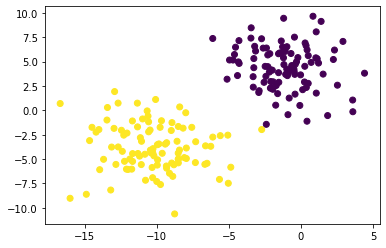

In [43]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.01, random_state=0)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

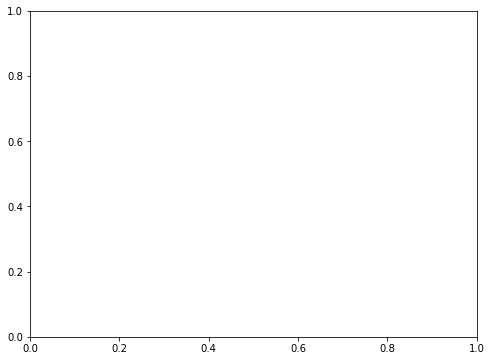

In [45]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

nie wiem dlaczego nie wychodzi wykres... co do wniosków to pewnie im większe C, czyli mniejsza regularyzacja to te linie będą bardziej w którąś stronę przesunięte (?)

Zadanie2: Przetestować inne wartości gamma (np. 10, 50) dla danych wyżej. Skomentować wyniki w konkteście definicji parametru gamma.

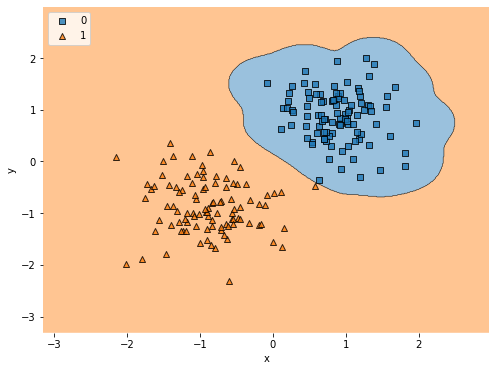

In [38]:
svm = SVC(kernel='rbf', C=1., gamma=10, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

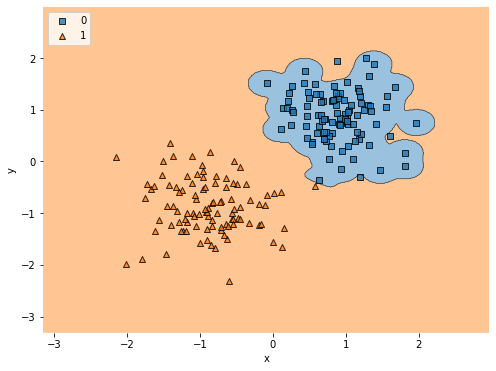

In [39]:
svm = SVC(kernel='rbf', C=1., gamma=50, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

Tu z kolei im większa gamma tym mniejszy, bardziej dokładny "margines"/podział.

Zadanie3: Uzupełnij definicję poniżej klasy.

In [4]:
from typing import List

class Optimizer:
    """Base class for each optimizer"""
    
    def __init__(self, initial_params):
        # store model weights
        self.params = initial_params
    
    def step(self):
        """Updates the weights stored in self.params"""
        raise NotImplementedError()
         
    def zero_grad(self):
        """Torch accumulates gradients, so we need to clear them after every update"""
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

In [7]:
class Momentum(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        
        self.learning_rate = learning_rate
        self.gamma = gamma
        
        self.deltas = []
        
        for param in self.params:
            self.deltas.append(torch.zeros_like(param))
            
    @torch.no_grad()
    def step(self):
        for i in range (len(self.param)):
            self.deltas= self.gamma * self.deltas + eta * self.learning_rate * param.grad
        for param in self.params:
            param-= self.deltas

In [8]:
visualize_optimizer(Momentum, n_steps=20, learning_rate=0.05, gamma=0.8) 
#nie wiem za bardzo, która tu niby jest float, to wtedy bym zamieniła nawiasem może???

TypeError: can't multiply sequence by non-int of type 'float'

Zadanie4: Uzupełnij definicję poniżej klasy.

In [13]:
class Adagrad(Optimizer):
    
    def __init__(self, initial_params, learning_rate, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.G[t]= G[t]
    
    @torch.no_grad()
    def step(self):
        for param in self.params:
             a= eta * self.learning_rate * param.grad
        for i in range (len(t)):
            G[i]= a^2
        for param in self.params:
            param-= self.params - eta/(torch.sqrt(G[i])+10^(-8))*a
        

In [14]:
test_optimizer(Adagrad)

NameError: name 'G' is not defined

Zadanie5: Uzupełnij definicję poniżej klasy.

In [47]:
class RMSProp(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.H[t]= H[t]
        
    @torch.no_grad()
    def step(self):
        for i in range(len(t)):
            H[i]+= self.gamma* self.H[t]+(1-self.gamma)* (eta * self.learning_rate * param.grad)^2
        for param in self.params:
            param-= self.params - eta/(torch.sqrt(H[i])+10^(-8))* eta * self.learning_rate * param.grad

Zadanie6: Uzupełnij definicję poniżej klasy.

In [16]:
class Adadelta(Optimizer):
    def __init__(self, initial_params, gamma, epsilon):
        super().__init__(initial_params)
        self.gamma = gamma
        self.epsilon = epsilon
        self.deltas = []
        
        for param in self.params:
            self.deltas.append(torch.zeros_like(param))
        
        self.D[t]= D[t]
        
    @torch.no_grad()
    def step(self):
        for i in range(len(t)):
            H[i]+= self.gamma* self.H[t]+(1-self.gamma)* (eta * self.learning_rate * param.grad)^2
        for i in range (len(t)): ##albo len od self.params??
            self.deltas= (torch.sqrt(D[i])* 10^(-8))/(torch.sqrt(H[i])+ 10^(-8))* eta * self.learning_rate * param.grad
        for param in self.params:
            param-= self.params- self.deltas
        for i in range (len(t)):
            D[i]+= self.gamma*D[i]+(1- self.gamma)*self.deltas^2
        

Zadanie7: Uzupełnij definicję poniżej klasy

In [46]:
class Adam(Optimizer):
   
    def __init__(self, initial_params, learning_rate, beta1, beta2, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        
        ??? ##na pewno jakoś te m i v, ale znowu wydaje mi się, że w poprzednich przykładach źle zrobiłam..
        
    @torch.no_grad()
    def step(self,):
        for i in range(len(t)):
            m[i]+=self.beta1*m[i]+(1-self.beta1)*eta * self.learning_rate * param.grad
            v[i]+=self.beta2*v[i]+(1-self.beta2)*eta * self.learning_rate * param.grad
            
    ##tu jest moment gdzie kompletnie zgłupiałam ale próbuję..może tak?
        m= m[t]/1-self.beta1^(t+1) 
        v= v[t]/1-self.beta2^(t+1)
        
        for param in self.params:
            param-= self.params-eta*m/ (torch.sqrt(v)+10^(-8))